### Danielle's Single Core + Double Core Common Envelope Project

A lot of this code is coming from Danielle's notebook

In [2]:
import h5py as h5                   # h5py is a helpful package to read h5 files, h5 files are popular astro files that handle big data
import numpy as np               # numpy is a helpful python package for mathematical operations
import matplotlib.pyplot as plt     # matplotlib is a helpful plotting python package
import matplotlib.colors as colors
import matplotlib.style as style

from matplotlib import rcParams

In [3]:
# Single Core .h5 File
file_pathCSingle = 'COMPASOutput_SingleCore.h5'
fdataSC = h5.File(file_pathCSingle, 'r')
print(fdataSC)
fdataSC.close()

<HDF5 file "COMPASOutput_SingleCore.h5" (mode r)>


In [4]:
# Double Core .h5 File
file_pathCDouble = 'COMPASOutput_DoubleCore.h5'
fdataDC = h5.File(file_pathCDouble, 'r')
print(fdataDC)
fdataDC.close()

<HDF5 file "COMPASOutput_DoubleCore.h5" (mode r)>


#### Single Core

In [5]:
# Getting all the keys for Single Core file
fdataSC = h5.File(file_pathCSingle, 'r')
fdcoSC = fdataSC['doubleCompactObjects']
#list(fdcoSC.keys())

In [6]:
# using metallicity for Single Core

fMetSC = fdcoSC['Metallicity1'][...].squeeze()
print(fMetSC)
metallicityGridSC = np.unique(fMetSC)
metallicityGrid = metallicityGridSC
print(len(np.unique(fMetSC)))

[0.0001 0.0001 0.0001 ... 0.03   0.03   0.03  ]
53


In [7]:
# set up, Floor's old code

def calculate_formation_efficiencies(path_to_file, metallicityGrid=metallicityGrid):

        fdata = h5.File(path_to_file, 'r') # open the file for reading
        fDCO  = fdata['doubleCompactObjects'] # gettin the DCO info from the file

        # some of the parameters that the data stores
        metallicitySystems  = fDCO['Metallicity1'][...].squeeze() #getting ALL the metallicities from the DCO file
        delayTimes          = fDCO['tform'][...].squeeze() + \
                                   fDCO['tc'][...].squeeze() # delay time in Myr of the systems
        tc                  = fDCO['tc'][...].squeeze() # coalescence time in Myr
        mass1               = fDCO['M1'][...].squeeze() # mass of the primary compact object (initially most massive star)
        mass2               = fDCO['M2'][...].squeeze() # mass of the secondary compact object (initially least massive star)
        weights              = fDCO['weight'][...].squeeze() # weight of this sample ("probability")
        m1zams              = fDCO['M1ZAMS'][...].squeeze() # initial mass of the primary at ZAMS
        m2zams              = fDCO['M2ZAMS'][...].squeeze() # initial mass of the secondary at ZAMS
        separationzams      = fDCO['separationInitial'][...].squeeze() # initial separation of the system at ZAMS

        unique_metallicities_simulation = np.unique(metallicitySystems) # getting rid of repeat values from the metallicity list

        meanMassEvolved = 77708655 # average mass that a simulation represents at a single metallicity

        #list of the same length as the metallicityGrid but filled with zeroes
        formation_efficiency           = np.zeros(len(metallicityGrid))

        for nrZ, Z in enumerate(metallicityGrid): # loop for all the enumerated items in the list, z is a metallicity Danielle ._.
            if Z in unique_metallicities_simulation: # if that metallicity value is in the unique metallicity list
                maskZ = (metallicitySystems == Z) # get all truth values where the metallicities we want match the metallicities in the unique grid
                formation_efficiency[nrZ] = (np.sum(weights[maskZ]))/meanMassEvolved  # //floor weights because not every binary in COMPAS is equally represented in the galaxy
                # fren..........
                # calculating the formation efficiency per specified metallicity (but idk why the metallicity truth value is over the sum of the _probabilities_ of the masses for each corresponding metallicity)

        # this returns the formation efficiency in units per solar mass [Msun^-1]
        return formation_efficiency

In [8]:
metallicityGridSC = np.unique(fMetSC)
formation_efficiencySC = calculate_formation_efficiencies(path_to_file = 'COMPASOutput_SingleCore.h5', metallicityGrid = metallicityGridSC)
print(len(formation_efficiencySC)) #just to make sure they're the same size
print(len(metallicityGridSC))

53
53


In [9]:
print('The Single Core CE formation efficiencies in units of solar masses formed is:')
print(formation_efficiencySC, '[Msun^-1]' )
print()
print('the corresponding metallicities are:')
print(metallicityGridSC)

The Single Core CE formation efficiencies in units of solar masses formed is:
[7.70005224e-06 6.70299309e-06 5.73614578e-06 4.57486358e-06
 3.50648263e-06 3.27695013e-06 3.08962990e-06 3.57796768e-06
 4.07735885e-06 4.78651682e-06 5.78099536e-06 6.79687844e-06
 7.51939765e-06 9.99150349e-06 1.10610752e-05 1.23882025e-05
 1.33639474e-05 1.38279483e-05 1.42869586e-05 1.28418882e-05
 1.17291342e-05 1.10644993e-05 1.71612004e-05 2.21737808e-05
 2.67701836e-05 2.87694834e-05 2.83317654e-05 2.70830004e-05
 2.67221825e-05 2.45788885e-05 2.08586561e-05 1.58222361e-05
 9.97812078e-06 5.60424669e-06 2.23239363e-06 7.93540377e-07
 4.61527148e-07 4.96565469e-07 7.77513970e-07 1.04391518e-06
 9.72178157e-07 1.19058110e-06 8.59251322e-07 3.67234133e-07
 8.21001097e-07 4.52238942e-07 2.48881014e-07 2.07433127e-07
 1.98024716e-07 5.74810634e-08 6.44890656e-08 6.22138603e-08
 2.16361589e-08] [Msun^-1]

the corresponding metallicities are:
[0.0001  0.00011 0.00012 0.00014 0.00016 0.00017 0.00019 0.00022

Text(0.5, 1.0, 'Formation Efficiency vs Metallicity of Single Core Systems')

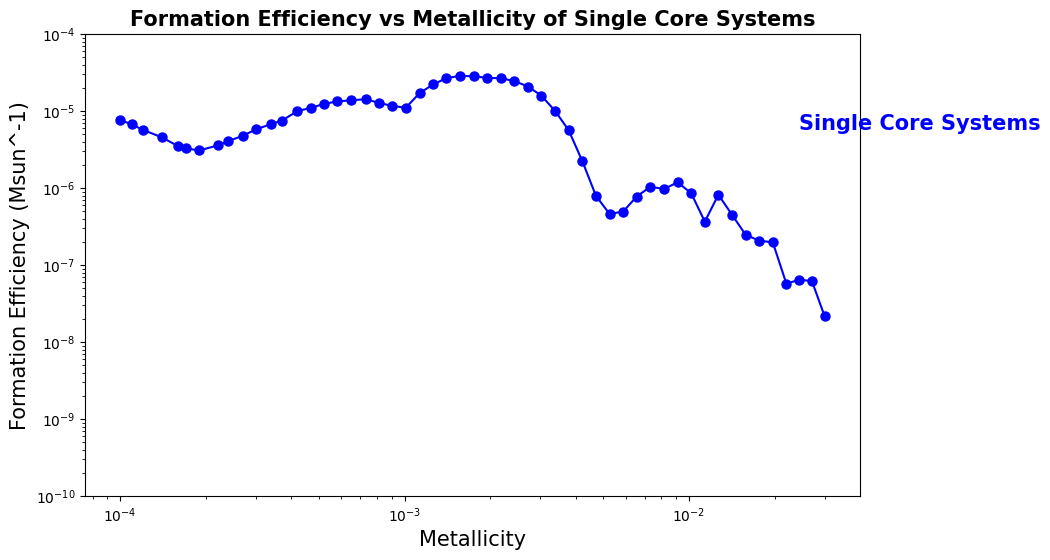

In [10]:
f, ax = plt.subplots(figsize=(10,6))

ax.text(metallicityGridSC[50], formation_efficiencySC[10],'Single Core Systems', weight='bold', fontsize=15, color='b')
ax.set_ylim(10**-10, 10**-4)
ax.set_yticks([10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4])

ax.plot(metallicityGridSC, formation_efficiencySC, color='b', marker='.', markersize=13)
ax.set_xlabel('Metallicity', fontsize = 15)
ax.set_ylabel('Formation Efficiency (Msun^-1)', fontsize = 15)
ax.set_yscale('log')

ax.set_xscale('log')
ax.set_title('Formation Efficiency vs Metallicity of Single Core Systems', fontsize=15, weight='bold')

#### Double Core

In [11]:
fdataDC = h5.File(file_pathCDouble, 'r')
fdcoDC = fdataDC['doubleCompactObjects']
#print(fdcoDC.keys())

# getting metallicity for Double Core

fMetDC = fdcoDC['Metallicity1'][...].squeeze()
print(fMetDC)
metallicityGridDC = np.unique(fMetDC)
metallicityGrid = metallicityGridDC

metallicityGridDC = np.unique(fMetDC)
formation_efficiencyDC = calculate_formation_efficiencies(path_to_file = 'COMPASOutput_DoubleCore.h5', metallicityGrid = metallicityGridDC)

print('The Double Core CE formation efficiencies in units of solar masses formed is:')
print(formation_efficiencyDC, '[Msun^-1]' )
print()
print('the corresponding metallicities are:')
print(metallicityGridDC)

[0.0001 0.0001 0.0001 ... 0.03   0.03   0.03  ]
The Double Core CE formation efficiencies in units of solar masses formed is:
[6.01488228e-06 4.96251764e-06 4.50551725e-06 3.66424334e-06
 3.44795157e-06 3.07279369e-06 2.79641684e-06 3.20387818e-06
 3.60701195e-06 3.99040410e-06 4.76798544e-06 5.17551528e-06
 5.60214462e-06 6.03663427e-06 6.33160792e-06 6.38668101e-06
 6.43735217e-06 6.22180384e-06 5.99129118e-06 5.37035347e-06
 4.83115913e-06 4.26416714e-06 5.75093533e-06 6.76611974e-06
 7.43126968e-06 7.93488909e-06 8.11249582e-06 7.79237257e-06
 7.01819292e-06 6.49474385e-06 5.93979087e-06 5.16098180e-06
 4.40244244e-06 4.22343039e-06 2.84094120e-06 1.10894136e-06
 3.94012663e-07 8.90679031e-07 1.40144059e-06 1.78189929e-06
 1.94922232e-06 1.85496759e-06 1.47593456e-06 1.51303227e-06
 1.29239782e-06 1.20687615e-06 1.13298498e-06 1.19338854e-06
 1.38787779e-06 1.71299649e-06 2.01892451e-06 2.24255709e-06
 2.30750707e-06] [Msun^-1]

the corresponding metallicities are:
[0.0001  0.00011

Text(0.5, 1.0, 'Formation Efficiency vs Metallicity of Double Core Systems')

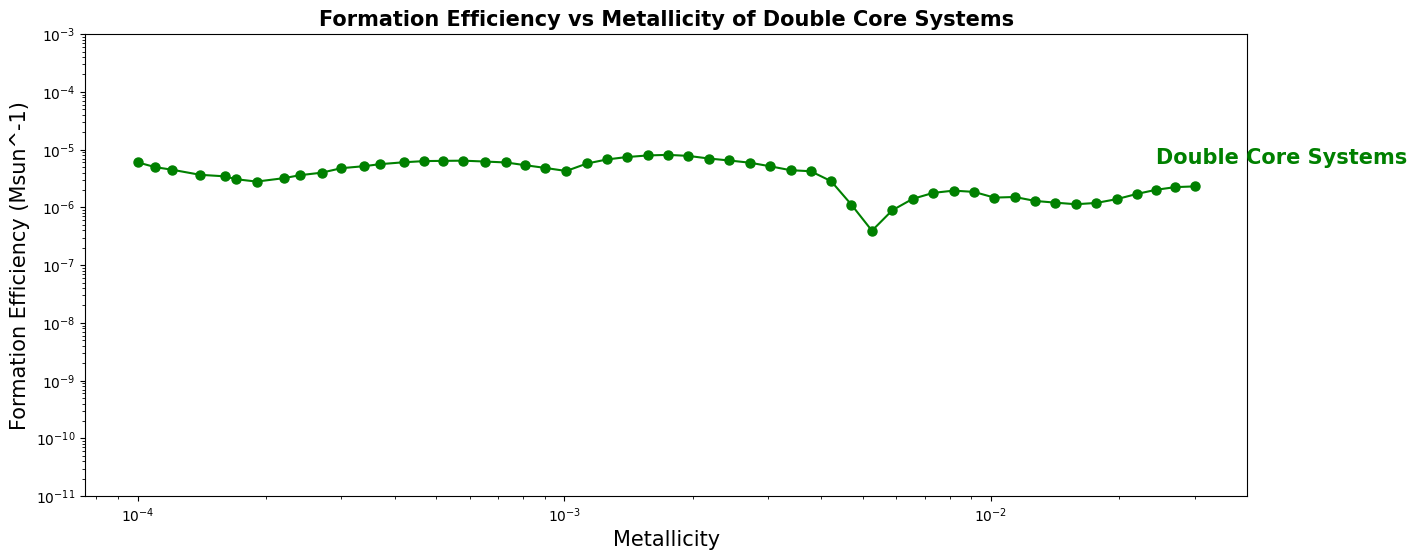

In [12]:
f, ax = plt.subplots(figsize=(15,6))

ax.text(metallicityGridDC[50], formation_efficiencySC[10],'Double Core Systems', weight='bold', fontsize=15, color='g')
ax.set_ylim(10**-8, 10**-4)
ax.set_yticks([10**-11, 10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3])

ax.plot(metallicityGridDC, formation_efficiencyDC, color='g', marker='.', markersize=13)
ax.set_xlabel('Metallicity', fontsize = 15)
ax.set_ylabel('Formation Efficiency (Msun^-1)', fontsize = 15)
ax.set_yscale('log')

ax.set_xscale('log')
ax.set_title('Formation Efficiency vs Metallicity of Double Core Systems', fontsize=15, weight='bold')

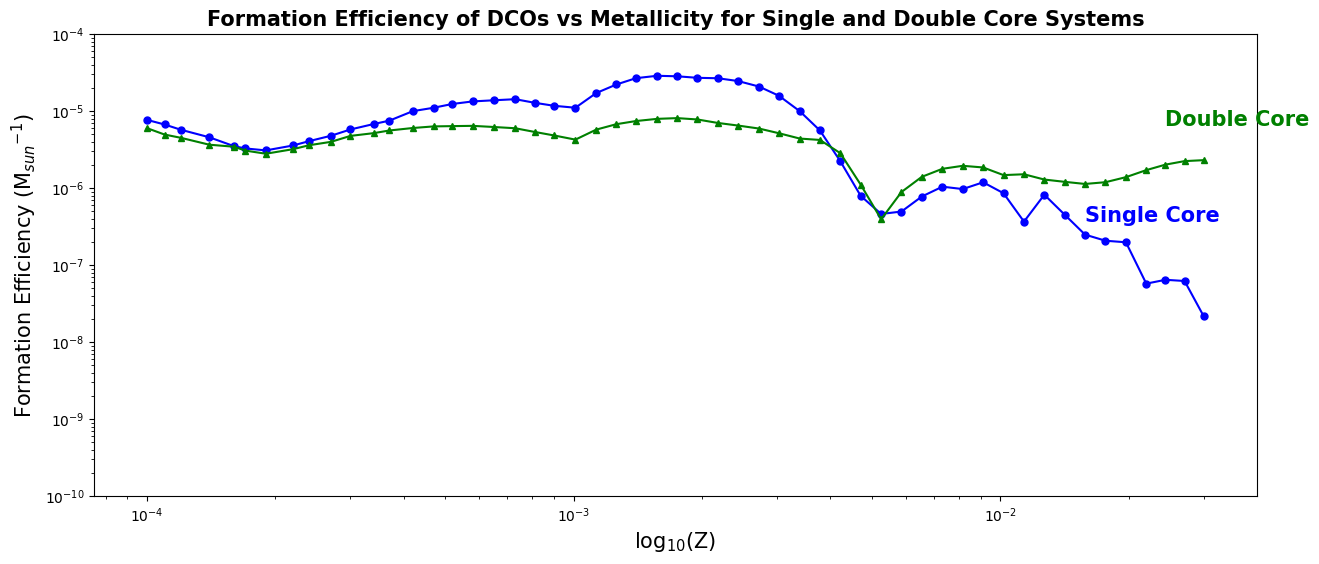

In [13]:
# plotting everything together

#everything that's the same
f, ax = plt.subplots(figsize=(15,6))
ax.set_ylim(10**-10, 10**-4)
ax.set_yticks([10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4])
ax.set_xlabel('log$_{10}$(Z)', fontsize = 15)
ax.set_ylabel('Formation Efficiency (M$_{sun}$$^{-1}$)', fontsize = 15)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Formation Efficiency of DCOs vs Metallicity for Single and Double Core Systems', fontsize=15, weight='bold')

#each plot label
ax.text(metallicityGridSC[46], formation_efficiencySC[43],'Single Core', weight='bold', fontsize=15, color='b')
ax.text(metallicityGridDC[50], formation_efficiencyDC[15],'Double Core', weight='bold', fontsize=15, color='g')
# i dont think there's a universe where i dont spend like 20 minutes trying to get the text in a proper spot

#each plot
ax.plot(metallicityGridSC, formation_efficiencySC, color='b', marker='o', markersize=5)
ax.plot(metallicityGridDC, formation_efficiencyDC, color='g', marker='^', markersize=5)

In [14]:
# what if we tried to separate the DCO formation through the different flavours oooo fancy

### Formation Efficiency Plots by DCO Flavor

In [15]:
# SINGLE CORE

DCO_mass1_SC = fdcoSC['M1'][...].squeeze() # mass1 of the DCO
DCO_mass2_SC = fdcoSC['M2'][...].squeeze() # mass2 of the DCO
DCO_seed_SC = fdcoSC['seed'][...].squeeze() # seeds of all the DCOs
print(len(DCO_seed_SC))

# filtering DCO seeds by flavour :D yayy
seed_SC_BBH = DCO_seed_SC[ (DCO_mass1_SC > 2.5) & (DCO_mass2_SC > 2.5)][...].squeeze()
seed_SC_BHNS = DCO_seed_SC[ ((DCO_mass1_SC < 2.5) & (DCO_mass2_SC > 2.5)) |  (DCO_mass1_SC > 2.5) & (DCO_mass2_SC < 2.5)][...].squeeze()
seed_SC_BNS = DCO_seed_SC[ (DCO_mass1_SC < 2.5) & (DCO_mass2_SC < 2.5)][...].squeeze()

# checking through DCO seeds and amounts
# print(seed_SC_BBH)
# print(len(seed_SC_BBH))
# print(seed_SC_BHNS)
# print(len(seed_SC_BHNS))
# print(seed_SC_BNS)
# print(len(seed_SC_BNS))

474405


In [16]:
# dont run this, this is jus an explanation

# this line is saying: for the filter, instead of getting the masses, let's get the seeds for those masses
seed_SC_BBH = DCO_seed_SC[ (DCO_mass1_SC > 2.5) & (DCO_mass2_SC > 2.5)][...].squeeze() #squeeze is gonna put everythin in one row/axis
print(DCO_mass1_SC)
print(DCO_mass1_SC.shape) # returns the shape of the array in the form (no. of rows, no. of columns). the array has 474405 rows, 1 column
print(DCO_mass1_SC.ndim) # returns the dimension (number of axes ig) in the array
print(len(DCO_mass1_SC)) # gonna tell you how many things are there in a single dimension array
print((DCO_mass1_SC > 2.5)) # gonna tell you the output of the logic condition in brackets
print(np.sum((DCO_mass1_SC > 2.5))) # gets the sum of the stuff in the logic output
print(DCO_mass1_SC[(DCO_mass1_SC > 2.5)]) # out of all the MASSES, we need the masses that match this condition. if that's the case then,
print(DCO_seed_SC[(DCO_mass1_SC > 2.5)]) # out of all the SEEDS, we need the MASSES that match this condition. it mek sense if you like squint your eye n tilt your head a lil idk

# now we're ready to do real stuff!

[38.9402  38.9261  31.5251  ...  1.27759  1.39338  1.30417]
(474405,)
1
474405
[ True  True  True ... False False False]
474203
[38.9402  38.9261  31.5251  ...  5.51543  5.28226  5.8715 ]
[   5000678    5003099    5004232 ... 5190001934 5160010639 5220080208]


In [17]:
# Getting metallicities for each flavour

# All Metallicities
print('All Metallicities: ')
metallicity_SC = fdcoSC['Metallicity1'][...].squeeze()
print(metallicity_SC)
print(len(metallicity_SC))

# BBH Metallicities
print('\nBBH Metallicites: ')
metallicity_SC_BBH = metallicity_SC[(DCO_mass1_SC > 2.5) & (DCO_mass2_SC > 2.5)]
print(metallicity_SC_BBH)
print(len(metallicity_SC_BBH))

# BHNS Metallicities
print('\nBHNS Metallicites: ')
metallicity_SC_BHNS = metallicity_SC[((DCO_mass1_SC < 2.5) & (DCO_mass2_SC > 2.5)) | ((DCO_mass1_SC > 2.5) & (DCO_mass2_SC < 2.5))]
print(metallicity_SC_BHNS)
print(len(metallicity_SC_BHNS))

# BNS Metallicities
print('\nBNS Metallicites: ')
metallicity_SC_BNS = metallicity_SC[(DCO_mass1_SC < 2.5) & (DCO_mass2_SC < 2.5)]
print(metallicity_SC_BNS)
print(len(metallicity_SC_BNS))

All Metallicities: 
[0.0001 0.0001 0.0001 ... 0.03   0.03   0.03  ]
474405

BBH Metallicites: 
[0.0001  0.0001  0.0001  ... 0.02705 0.02705 0.02705]
360160

BHNS Metallicites: 
[0.0001  0.0001  0.0001  ... 0.02705 0.02705 0.03   ]
114043

BNS Metallicites: 
[0.00157 0.00175 0.00175 0.00175 0.00175 0.00175 0.00195 0.00218 0.00218
 0.00218 0.00218 0.00218 0.00218 0.00243 0.00243 0.00243 0.00243 0.00303
 0.00732 0.00732 0.00817 0.00817 0.0244  0.0244  0.0244  0.0244  0.0244
 0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244
 0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244
 0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244
 0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244  0.0244
 0.0244  0.0244  0.0244  0.0244  0.02705 0.02705 0.02705 0.02705 0.02705
 0.02705 0.02705 0.02705 0.02705 0.02705 0.02705 0.02705 0.02705 0.02705
 0.02705 0.02705 0.02705 0.02705 0.02705 0.02705 0.02705 0.02705 0.02705
 0.02705 0.02705 

In [18]:
print(metallicityGrid.shape)

(53,)


In [19]:
# Function to calculate the formation efficiencies by type for SC and DC with ONE metalllicity grid for each, Danielle's modification to Floor's function

def calculate_formation_efficiencies_byType(path_to_file, metallicityGrid=metallicityGrid, DCO_type="BBH"):

        fdata = h5.File(path_to_file, 'r')                          # path to DC or SC file
        fDCO  = fdata['doubleCompactObjects']                       # accessing DCO information

        # Parameters that the data stores
        metallicitySystems  = fDCO['Metallicity1'][...].squeeze()   # all metallicities in the file
        mass1               = fDCO['M1'][...].squeeze()             # M1 of all DCOs
        mass2               = fDCO['M2'][...].squeeze()             # M2 of all DCOs
        weights             = fDCO['weight'][...].squeeze()         # 'weights' (probabilities) of all DCOs
        meanMassEvolved     = 77708655

        # All unique metallicites
        unique_metallicities_simulation = np.unique(metallicitySystems) # getting rid of repeat values from the metallicity list

        # Formation Efficiency list same length as metallicityGrid
        formation_efficiency           = np.zeros(len(metallicityGrid)) # array to store formation efficiency, same length as the metallicity grid

        # Getting all the masses to get all the seeds
        DCO_mass1 = fDCO['M1'][...].squeeze() # mass1 of the DCO (pretty sure this is a repeat of mass1)
        DCO_mass2 = fDCO['M2'][...].squeeze() # mass2 of the DCO (pretty sure this is a repeat of mass1)
        DCO_seed  = fDCO['seed'][...].squeeze() # seeds of all the DCOs

        # Metallicity per type
        metallicity_SC_BBH = metallicitySystems[(DCO_mass1_SC > 2.5) & (DCO_mass2_SC > 2.5)][...].squeeze()
        metallicity_SC_BHNS = metallicitySystems[((DCO_mass1_SC < 2.5) & (DCO_mass2_SC > 2.5)) |  (DCO_mass1 > 2.5) & (DCO_mass2 < 2.5)][...].squeeze()
        metallicity_SC_BNS = metallicitySystems[(DCO_mass1_SC < 2.5) & (DCO_mass2_SC < 2.5)][...].squeeze()

        # Filter the weights? im desperate rn
        weight_SC_BBH   = weights[(DCO_mass1_SC > 2.5) & (DCO_mass2_SC > 2.5)][...].squeeze()
        weight_SC_BHNS  = weights[((DCO_mass1_SC < 2.5) & (DCO_mass2_SC > 2.5)) |  (DCO_mass1 > 2.5) & (DCO_mass2 < 2.5)][...].squeeze()
        weight_SC_BNS   = weights[(DCO_mass1_SC < 2.5) & (DCO_mass2_SC < 2.5)][...].squeeze()
        print(metallicityGrid.shape)


        for nrZ, Z in enumerate(metallicityGrid):
          
          if Z in unique_metallicities_simulation:

            # Filter for Binary Black Holes
            if DCO_type == 'BBH':
              maskZ = (metallicity_SC_BBH == Z)
              dco_weights = weight_SC_BBH

            # Filter for Black Hole Neutron Stars
            if DCO_type == 'BHNS':
                maskZ = (metallicity_SC_BHNS == Z)
                dco_weights = weight_SC_BHNS

            # Filter for Binary Neutron Stars
            if DCO_type == 'BNS':
                maskZ = (metallicity_SC_BNS == Z)
                dco_weights = weight_SC_BNS
            
            formation_efficiency[nrZ] = (np.sum(dco_weights[maskZ]))/meanMassEvolved


        return formation_efficiency

In [20]:
# Finding Formation Efficiencies for SC BBH

metallicityGrid_SC_BBH = np.unique(metallicity_SC_BBH)
formation_efficiency_SC_BBH = calculate_formation_efficiencies_byType(path_to_file = 'COMPASOutput_SingleCore.h5', metallicityGrid = metallicityGrid, DCO_type = 'BBH')

print('The Single Core CE formation efficiencies for BBH in units of solar masses formed is:')
print(formation_efficiency_SC_BBH, '[Msun^-1]' )
print()
print('the corresponding metallicities are:')
print(metallicityGrid_SC_BBH)
print(len(formation_efficiency_SC_BBH))

(53,)
The Single Core CE formation efficiencies for BBH in units of solar masses formed is:
[4.89811029e-06 4.47260677e-06 3.87695934e-06 3.03760809e-06
 2.19209779e-06 2.03736574e-06 1.85980122e-06 2.17797064e-06
 2.42889814e-06 3.10847825e-06 3.63514398e-06 4.23972891e-06
 4.86763831e-06 6.59848305e-06 7.14342060e-06 7.80836853e-06
 9.10987819e-06 9.32273077e-06 9.94115403e-06 9.32829375e-06
 8.51960722e-06 8.22422860e-06 1.23320641e-05 1.55993558e-05
 1.91592956e-05 2.02929733e-05 1.96239198e-05 1.85854666e-05
 1.79398861e-05 1.63779486e-05 1.32009934e-05 9.31912270e-06
 5.07709635e-06 2.68064251e-06 1.06726762e-06 2.92861962e-07
 2.32651061e-07 8.34993273e-08 3.14041863e-07 5.85161458e-07
 4.20431297e-07 4.26707879e-07 3.27500390e-07 2.69560570e-07
 7.75925710e-07 3.75048422e-07 1.29497446e-07 9.73503352e-08
 7.19258553e-08 0.00000000e+00 1.43797335e-08 2.06898737e-08
 0.00000000e+00] [Msun^-1]

the corresponding metallicities are:
[0.0001  0.00011 0.00012 0.00014 0.00016 0.00017 0

In [26]:
# Finding Formation Efficiencies for SC BBH

metallicityGrid_SC_BHNS = np.unique(metallicity_SC_BHNS)
formation_efficiency_SC_BHNS = calculate_formation_efficiencies_byType(path_to_file = 'COMPASOutput_SingleCore.h5', metallicityGrid = metallicityGrid, DCO_type = 'BHNS')

print('The Single Core CE formation efficiencies for BHNS in units of solar masses formed is:')
print(formation_efficiency_SC_BHNS, '[Msun^-1]' )
print()
print('the corresponding metallicities are:')
print(metallicityGrid_SC_BHNS)
print(len(metallicityGrid_SC_BHNS))

(53,)
The Single Core CE formation efficiencies for BHNS in units of solar masses formed is:
[2.80194195e-06 2.23038631e-06 1.85918643e-06 1.53725549e-06
 1.31438484e-06 1.23958439e-06 1.22982868e-06 1.39999703e-06
 1.64846071e-06 1.67803857e-06 2.14585139e-06 2.55714953e-06
 2.65175934e-06 3.39302044e-06 3.91765462e-06 4.57983401e-06
 4.25406921e-06 4.50521756e-06 4.34580460e-06 3.51359448e-06
 3.20952696e-06 2.84027067e-06 4.82913633e-06 6.57442498e-06
 7.60972201e-06 8.47569798e-06 8.70113229e-06 8.49580108e-06
 8.77739254e-06 8.19681364e-06 7.65766278e-06 6.50198387e-06
 4.90102443e-06 2.92360418e-06 1.16512602e-06 5.00678415e-07
 2.28876087e-07 4.13066141e-07 4.63472107e-07 4.58020897e-07
 5.50435965e-07 7.63873226e-07 5.31750933e-07 9.76735631e-08
 4.50753871e-08 7.71905198e-08 1.19383568e-07 1.10082792e-07
 1.26098861e-07 5.74810634e-08 4.31392005e-08 2.99642850e-08
 1.48632708e-08] [Msun^-1]

the corresponding metallicities are:
[0.0001  0.00011 0.00012 0.00014 0.00016 0.00017 

In [25]:
# Finding Formation Efficiencies for SC BNS

metallicityGrid_SC_BNS = np.unique(metallicity_SC_BNS)
formation_efficiency_SC_BNS = calculate_formation_efficiencies_byType(path_to_file = 'COMPASOutput_SingleCore.h5', metallicityGrid = metallicityGrid, DCO_type = 'BNS')

print('The Single Core CE formation efficiencies for BNS in units of solar masses formed is:')
print(formation_efficiency_SC_BNS, '[Msun^-1]' )
print()
print('the corresponding metallicities are:')
print(metallicityGrid_SC_BNS)
print(len(metallicityGrid_SC_BNS))

(53,)
The Single Core CE formation efficiencies for BNS in units of solar masses formed is:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.12172187e-10 6.71332223e-09 1.73267310e-09
 4.90394728e-09 4.12624073e-09 0.00000000e+00 1.12954260e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.32825909e-10
 1.31089469e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.97013159e-09 1.15597016e-08
 6.77288812e-09] [Msun^-1]

the corresponding metallicities are:
[0.00157 0.00175 0.00195 0.00218 0.00243 0.00303 0

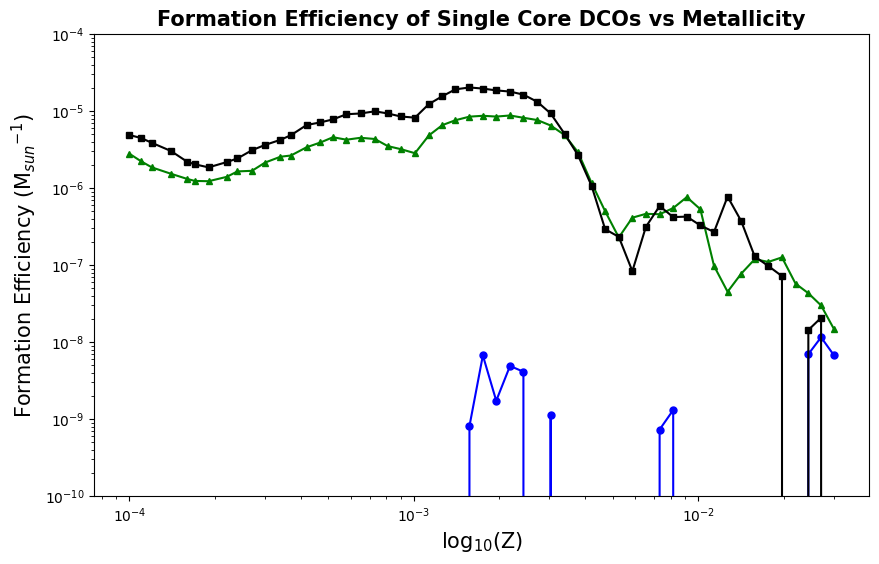

In [24]:
# im gonna try plotting it all at once so i can jus get a first look hollon

#everything that's the same
f, ax = plt.subplots(figsize=(10,6))
ax.set_ylim(10**-10, 10**-4)
ax.set_yticks([10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4])
ax.set_xlabel('log$_{10}$(Z)', fontsize = 15)
ax.set_ylabel('Formation Efficiency (M$_{sun}$$^{-1}$)', fontsize = 15)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Formation Efficiency of Single Core DCOs vs Metallicity', fontsize=15, weight='bold')

#each line text
#ax.text(metallicityGrid_SC_BNS[7], formation_efficiency_SC_BNS[10],'BNS', weight='bold', fontsize=15, color='b')
#ax.text(metallicityGrid_SC_BHNS[5], formation_efficiency_SC_BHNS[12],'BHNS', weight='bold', fontsize=15, color='g')
#ax.text(metallicityGrid_SC_BBH[5], formation_efficiency_SC_BBH[33],'BBH', weight='bold', fontsize=15, color='k')
#there's no real strategy w this i pretty much jus spent half of the day trying to get the label

#each line plot
#ax.plot(metallicityGrid_SC_BNS, formation_efficiency_SC_BNS, color='b', marker='o', markersize=5)
#ax.plot(metallicityGrid_SC_BHNS, formation_efficiency_SC_BHNS, color='g', marker='^', markersize=5)
#ax.plot(metallicityGrid_SC_BBH, formation_efficiency_SC_BBH, color='k', marker='s', markersize=5)

#each line plot?
ax.plot(metallicityGrid, formation_efficiency_SC_BNS, color='b', marker='o', markersize=5)
ax.plot(metallicityGrid, formation_efficiency_SC_BHNS, color='g', marker='^', markersize=5)
ax.plot(metallicityGrid, formation_efficiency_SC_BBH, color='k', marker='s', markersize=5)